  ###    Will add intro.. 
SUPPORT VECTOR MACHINES: 

1) DECISION BOUNDARIES
2) WIDEST STREET APPROACH
3) KERNEL FUNCTIONS


## How would we split this dataset?  

<img src='iris_split1.png'/>


## And How would we split THIS dataset? 

<img src='iris_split2.png'/>

Given Positive and Negative Examples ..  

1) Draw a straight line 
   (Ok, but which straight line ? )
   Using the 'widest street approach'



$$\vec{w}\cdot\vec{u}\leq c$$
or 

EQN #1) Our Decision Rule: 
If: 
$$\vec{w}\cdot\vec{u} +b \geq 0$$     (where c = -b)
Then: positive sample


But, we dont know which constant weight (b) to use, and we dont know which w to use either (there are many w's that we 
can use, because w can be of any length)


EQN #2) For all x in the margins of our 'street':
$${y}_{i}(\vec{w}\cdot\vec{u}+b)-1=0$$ 


EQN #3)  Find our the width of our street:
 $$width =({x}_{+}-{x}_{-})\cdot{{\vec{w}\above 1pt\|w\|}}$$

EQN #4)  We need to maximize the following in order to get our widest street: 

 $$MAX  {{2\above 1pt\|w\|}}$$
 
 (ie) minimize the following: 

 
  $$   1/2{{\|w\|}^2}$$
  
  
EQN #5)  If we want to find the maximum of a function (that has restraints), then we need to use a technique called: Lagrange Multipliers: 

  $$ L=  1/2{{\|w\|}^2} - \sum \alpha_i[(y_i(\vec{w}\cdot{x_i} +b)-1] $$
  
EQN #6)  Now taking partial derivative of above (with respect to w), we find that :

  $$\vec{w} = \sum \alpha_i(y_i\cdot{x_i})$$
  
  And now we see that vector w is just a linear sum of our samples!

  $$\vec{w} = \sum \alpha_i(y_i\cdot{x_i})$$

And taking partial derivative of above (with respect to b) we have:

  $$ \sum \alpha_i(y_i)=0$$
  
 We discover that our optimization only depends on (what? )
 
  $$ L= \sum \alpha_i -1/2\sum\sum\alpha_i\alpha_j(y_iy_j)(x_i\cdot{x_j})$$
  
The Dot product of pairs of samples!
 
 And now we see that our Decision Rule depends only on our sample vectors and u (the unknown vector) 
 
  $$ \sum\alpha_iy_i(x_i\cdot\vec{u})$$
  
 Again, our solutions have total dependence on the Dot Products.
 
 It still doesn't seem possible that we can find a solution for the dataset above, using just the above equations .. right ?   Let's see..  

But first, a recap:

###  All of the above in a Nutshell 

### 1) Confidence in making the right prediction: The functional margin

for:
$$y^{i}=1$$
then for a large functional margin (greater confidence in correct prediction),we want: 

 $$\vec{w}\cdot{x}^{i} +b >> 0$$ 
 
 and $$y^{i}=-1$$
 we want : 
 
 $$\vec{w}\cdot{x}^{i} +b << 0$$ 
  
  We would like our functional margin to be as large as possible

### 2) Margin

Another intuition about choosing the best hyperplane is to choose one in which the distance from the training points is maximum  (formalized by the geometric margin:) 

 $$\gamma^{i} ={ \hat\gamma^{i}\above 1pt\|w\|}$$
 
 We can see that this is our functional margin normalized
 
 
 ### In Summary: 
 
To realize these intuitions and get the best hyperplane, the optimization problem is : 

Choose  $$\gamma,w,b$$
so as to maximize the geometric margin
subject to the condition that 

 $$y^{i}(\vec{w}\cdot{x}^{i})+b > \gamma$$
 
 and
 
 $$\|w\|=1$$

#### And what were Support Vectors Again?

SVMs find a decision boundary separating 2 classes that is spanned by a small # of training samples (called Support Vectors).  Support Vectors are the samples that lie closest to the other class, and thus are the most critical in defining our classes

In [ ]:
% pylab inline

In [94]:
import pandas as pd
from sklearn import datasets, svm
import seaborn as sns

In [103]:
plt.pcolormesh?

In [101]:
# In order gain intuition about how we are splitting our grid: we'll build the plot_estimator 
def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    x_min, x_max =X[:,0].min() -1, X[:,0].max() +.1
    y_min, y_max =X[:,1].min() -1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
                        
    Z= estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z=Z.reshape (xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1], c=y)

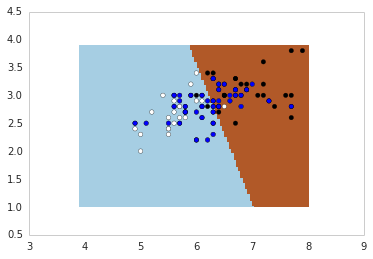

In [124]:
# Visualizing our Support Vectors: 
iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=0,:2]  # we only take the second 2 classes, first two features
y = iris.target[y!=0]

# The number of support vectors can 
# How do you think this model behaves in regards to outliers ?

# 
svc = svm.SVC(kernel='linear', C=1).fit(X, y)
plot_estimator(svc,X,y)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

Try experimenting with different values of C,  what differences do you see?   Plot 2 versions of the above side by side using very different C values.. 

* Note : C control the 'width' of our street !   (our margins..)

What really put SVMs on the map, is that we can choose from a wide range  of decision boundaries

We choose these decision boundaries by choosing a SVM kernel: 
The Kernel control how our model is 'sampled' in order to build a decision boundary 

1) 'linear' :  Linear decision boundary
2) 'poly' : Polynomial decicion boundary (adjust the order via 'order' argument
3) 'rbf': Radial Basis Function decision boundary : (Inserts Gaussian kernel at each support vector -- and builds decision boundary from here).
We can adjust this Gaussian kernel via the gamma feature 

On Your Own
    
- Given the (3) of types of kernels above, and our previous model above, build & plot 3 new models.  Which do you think is ideal for our data ? 

- Experiment with each of the different features in the models ( adjust order (for poly) and adjust gamma for (rbf).   What happens when we use a very large value for gamma ? 

In [141]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
svc=SVC(kernel='linear')
grid=GridSearchCV(svc,param_grid=dict(C=np.logspace(-3,3, 10)))
grid.fit(X,y)

GridSearchCV(cv=None,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   4.64159e-03,   2.15443e-02,   1.00000e-01,
         4.64159e-01,   2.15443e+00,   1.00000e+01,   4.64159e+01,
         2.15443e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [142]:
print grid.best_score_
#grid.best_params_

0.71


On Your Own:  

- Split the data using split the data using test train split

- Go through each kernel again and fit your test data
- Using a for loop, determine the best model using best_score and best_params
- Using predict, how do you score? 

Note!:  Will add Section here about Cost Functions 

In [ ]:
# ? flesh this out ? 
# pip install scikits.learn
import svm_gui1